In [73]:
import pandas as pd
import numpy as np

In [74]:
years

['2023',
 '2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011']

In [75]:
df_all_311 = pd.concat([pd.read_csv('./311_all_years/311_service_requests_' + year + '.csv') for year in years])

/var/folders/rm/gsdsmmyd1kg2sdz26j31kl800000gn/T/ipykernel_12178/3948634578.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all_311 = pd.concat([pd.read_csv('./311_all_years/311_service_requests_' + year + '.csv') for year in years])
/var/folders/rm/gsdsmmyd1kg2sdz26j31kl800000gn/T/ipykernel_12178/3948634578.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all_311 = pd.concat([pd.read_csv('./311_all_years/311_service_requests_' + year + '.csv') for year in years])


In [22]:
# df_all_311.to_csv('311_requests_alltime.csv', index=False)

In [76]:
print(df_all_311['case_status'].unique())
print(len(df_all_311))

['Open' 'Closed']
2525786


In [77]:
df_all_311 = df_all_311[(df_all_311['closure_reason'] != ' ') | (df_all_311['case_status'] == 'Open')]
print(len(df_all_311))

2525568


In [78]:
df_all_311 = df_all_311[(df_all_311['closure_reason'] != 'Case Closed Case Noted    ') | (df_all_311['case_status'] == 'Open')]
print(len(df_all_311))

2514452


In [79]:
df_all_311 = df_all_311[((df_all_311['closed_dt'].notna()) &  (df_all_311['closure_reason'].notna()))  | (df_all_311['case_status'] == 'Open')]
print(len(df_all_311))


2514452


In [80]:
print(df_all_311['case_status'].unique())

['Open' 'Closed']


In [81]:
df_all_311.to_csv('./311_trimmed/311_all_trimmed.csv', index=False)

In [82]:
df_all_311

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101004625277,2023-01-09 18:55:59,2023-03-16 08:30:00,NaN,OVERDUE,Open,,Graffiti Removal,Property Management,Graffiti,...,B2,Roxbury,13,8,0805,INTERSECTION Dunmore St & Magazine St,NaN,42.3594,-71.0587,Citizens Connect App
1,101004666905,2023-02-13 17:21:00,2024-02-13 17:21:00,NaN,ONTIME,Open,,New Tree Requests,Parks & Recreation Department,Trees,...,D4,Roxbury,4,03,0308,100-112 Shawmut Ave,2118.0,42.3466,-71.0656,Self Service
2,101004740172,2023-03-16 13:44:00,NaN,NaN,ONTIME,Open,,Schedule a Bulk Item Pickup,Public Works Department,Sanitation,...,C11,Dorchester,8,Ward 15,1504,6 Wilkinson Park,2122.0,42.3071,-71.0610,Constituent Call
3,101004680574,2023-02-16 13:34:00,2024-02-16 13:34:44,NaN,ONTIME,Open,,New Tree Requests,Parks & Recreation Department,Trees,...,E13,Jamaica Plain,10,Ward 19,1912,63 Northbourne Rd,2130.0,42.2917,-71.1150,Employee Generated
4,101004727845,2023-03-14 16:55:00,2023-03-16 16:55:16,NaN,OVERDUE,Open,,Unsanitary Conditions - Employees,Inspectional Services,Health,...,A1,Boston,3,03,0303,346 Hanover St,2113.0,42.3650,-71.0535,Constituent Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58246,101000369425,2011-12-31 21:11:56,NaN,2011-12-31 21:38:16,ONTIME,Closed,Case Closed Case Resolved GM2 making a sweep o...,Highway Maintenance,Public Works Department,Highway Maintenance,...,D4,Back Bay,14,Ward 4,0406,INTERSECTION Boylston St & Massachusetts Ave,NaN,42.3473,-71.0877,Constituent Call
58247,101000369427,2011-12-31 21:40:22,2012-01-05 08:30:00,2012-01-01 07:40:34,ONTIME,Closed,Case Closed Case Resolved at that location sid...,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,...,D14,Allston / Brighton,15,Ward 21,2112,90 Kilsyth Rd,2135.0,42.3402,-71.1456,Citizens Connect App
58248,101000369428,2011-12-31 22:25:24,2012-01-30 22:25:24,2012-01-03 10:24:21,ONTIME,Closed,Case Closed VIOCOR: Violation Corrected,Heat - Excessive Insufficient,Inspectional Services,Housing,...,B3,Greater Mattapan,13,Ward 14,1403,16 Glenway St,2121.0,42.3015,-71.0844,Constituent Call
58249,101000369429,2011-12-31 22:51:19,2012-01-30 22:51:19,2012-01-03 12:57:56,ONTIME,Closed,Case Closed ADCLSD: Administratively Closed,Heat - Excessive Insufficient,Inspectional Services,Housing,...,B3,Greater Mattapan,8,Ward 14,1402,130 Talbot Ave,2124.0,42.2931,-71.0813,Constituent Call


In [83]:
df_all_311['reason'].value_counts()

Enforcement & Abandoned Vehicles     364664
Street Cleaning                      356411
Sanitation                           348572
Highway Maintenance                  297566
Code Enforcement                     189626
Signs & Signals                      129495
Street Lights                        113094
Recycling                             98048
Trees                                 94074
Building                              92472
Housing                               83312
Park Maintenance & Safety             57817
Needle Program                        48818
Graffiti                              45236
Environmental Services                42171
Employee & General Comments           34367
Animal Issues                         30822
Administrative & General Requests     20431
Health                                14337
Abandoned Bicycle                      9079
Notification                           7197
Traffic Management & Engineering       7030
Catchbasin                      

In [84]:
df_eav = df_all_311[df_all_311['reason'] == 'Enforcement & Abandoned Vehicles']
df_eav.to_csv('./311_trimmed/311_Enforcement_Abandoned_Vehicles.csv', index=False)

df_sc = df_all_311[df_all_311['reason'] == 'Street Cleaning']
df_sc.to_csv('./311_trimmed/311_Street_Cleaning.csv', index=False)

df_san = df_all_311[df_all_311['reason'] == 'Sanitation']
df_san.to_csv('./311_trimmed/311_Sanitation.csv', index=False)

df_hm = df_all_311[df_all_311['reason'] == 'Highway Maintenance']
df_hm.to_csv('./311_trimmed/311_Highway_Maintenance.csv', index=False)

df_ce = df_all_311[df_all_311['reason'] == 'Code Enforcement']
df_ce.to_csv('./311_trimmed/311_Code_Enforcement.csv', index=False)

In [118]:
precinct = df_eav.groupby('precinct').first().index[1:]
precinct

Index(['0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109',
       '0110',
       ...
       '2204', '2205', '2206', '2207', '2208', '2209', '2210', '2211', '2212',
       '2213'],
      dtype='object', name='precinct', length=254)

In [133]:
close_rates = pd.DataFrame(index=precinct)
close_rates

""
precinct
0101
0102
0103
0104
0105
...
2209
2210
2211


In [146]:
import collections
dfs = {'All':df_all_311, 
    'Enforcement & Abandoned Vehicles':df_eav,
    'Street Cleaning':df_sc,
    'Sanitation':df_san,                    
    'Highway Maintenance':df_hm,
    'Code Enforcement':df_ce}



for case_type, case_data in dfs.items():
    case_status_raw = case_data.groupby('precinct').aggregate(lambda x : x)['case_status']

    case_status_raw = case_status_raw.iloc[1:]
    case_status_raw


    d = {}
    for i, v in case_status_raw.items():
        d[i] = collections.Counter(v)['Closed'] / (collections.Counter(v)['Closed'] + collections.Counter(v)['Open'])
    #     print(i,collections.Counter(v))

    # print(data)
    ser = pd.Series(data=d, index=precinct)
    # normalization
    close_rates[case_type] = (ser-ser.mean())/ser.std()
    close_rates

/var/folders/rm/gsdsmmyd1kg2sdz26j31kl800000gn/T/ipykernel_12178/4007297280.py:12: FutureWarning: ['case_enquiry_id', 'location_zipcode', 'latitude', 'longitude'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  case_status_raw = case_data.groupby('precinct').aggregate(lambda x : x)['case_status']
/var/folders/rm/gsdsmmyd1kg2sdz26j31kl800000gn/T/ipykernel_12178/4007297280.py:12: FutureWarning: ['case_enquiry_id', 'location_zipcode', 'latitude', 'longitude'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  case_status_raw = case_data.groupby('precinct').aggregate(lambda x : x)['case_status']
/var/folders/rm/gsdsmmyd1kg2sdz26j31kl800000gn/T/ipykernel_12178/4007297280.py:12: FutureWarning: ['case_enquiry_id', 'location_zipcode', 'latitude', 'longitude'] did not aggregate successfully. If an

In [147]:
close_rates

,All,Enforcement & Abandoned Vehicles,Street Cleaning,Sanitation,Highway Maintenance,Code Enforcement
precinct,,,,,,
0101,0.543597,0.823907,0.230043,0.343892,-0.634818,0.459469
0102,0.472054,0.736044,0.376109,0.543976,0.805549,0.571891
0103,0.533566,1.004247,0.283252,0.631031,0.633517,-0.038667
0104,0.551939,1.077675,0.148408,0.428388,0.686182,0.282714
0105,0.865155,0.765361,0.323933,-0.834410,1.366801,0.269862
...,...,...,...,...,...,...
2209,1.206767,0.606379,0.620538,0.017746,0.582678,0.561640
2210,0.916480,0.283285,0.548401,-0.045838,-0.012969,0.281287
2211,0.614743,-0.276213,0.156476,0.494598,-0.362462,0.507438


In [148]:
xl = pd.ExcelFile('./census_data_for_2022_redistricting.xlsx')
xl.sheet_names
census_df = xl.parse('2010')
census_df = census_df[:276]
census_df.columns=census_df.iloc[0] 
census_df = census_df[1:]
census_df

,Ward and Precinct (Updated 2022),Total Population,White alone,Black or African American,Hispanic or Latino (of any Race),Asian,American Indian and Alaska Native,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Non-White Races,...,Correctional Facilities for Adults,Juvenile Facilities,Nursing Facilities,Other Institutional Facilities,College / University Student Housing,Military Quarters,Other Noninstitutional Facilities,Total Housing Units,Occupied Housing Units,Vacant Housing Units
1,0101,2047,1200,57,668,64,9,0,44,5,...,0,0,0,0,0,0,1,1002,890,112
2,0102,2608,968,59,1441,51,8,0,78,3,...,0,0,0,0,0,0,0,1017,937,80
3,0103,3965,1417,294,1802,304,26,9,84,29,...,0,0,0,0,0,0,0,1840,1721,119
4,0104,2397,606,63,1576,61,9,0,69,13,...,0,0,0,0,0,0,44,919,849,70
5,0105,3649,1105,64,2238,95,1,1,129,16,...,0,0,0,0,0,0,9,1386,1281,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2209,2305,1712,43,115,398,2,3,19,13,...,0,0,0,0,0,0,25,986,935,51
272,2210,2429,1781,86,234,268,5,0,49,6,...,0,0,0,0,149,0,0,1061,1027,34
273,2211,1545,1043,111,167,183,3,2,23,13,...,0,0,0,0,0,0,0,629,600,29
274,2212,2168,1039,225,502,322,11,0,55,14,...,0,0,0,0,0,0,5,792,772,20


In [149]:
census_df['White ratio'] = (census_df['White alone']) / (census_df['Total Population']+1)
census_df['Black ratio'] = (census_df['Black or African American']) / (census_df['Total Population']+1)
census_df['Asian ratio'] = (census_df['Asian']) / (census_df['Total Population']+1)
census_df['Hispanic ratio'] = (census_df['Hispanic or Latino (of any Race)']) / (census_df['Total Population']+1)

In [150]:
census_df.index = census_df['Ward and Precinct (Updated 2022)']


In [151]:
census_df

,Ward and Precinct (Updated 2022),Total Population,White alone,Black or African American,Hispanic or Latino (of any Race),Asian,American Indian and Alaska Native,Native Hawaiian and Other Pacific Islander,Some Other Race,Two or More Non-White Races,...,College / University Student Housing,Military Quarters,Other Noninstitutional Facilities,Total Housing Units,Occupied Housing Units,Vacant Housing Units,White ratio,Black ratio,Asian ratio,Hispanic ratio
Ward and Precinct (Updated 2022),,,,,,,,,,,,,,,,,,,,,
0101,0101,2047,1200,57,668,64,9,0,44,5,...,0,0,1,1002,890,112,0.585938,0.027832,0.03125,0.326172
0102,0102,2608,968,59,1441,51,8,0,78,3,...,0,0,0,1017,937,80,0.371023,0.022614,0.019548,0.552319
0103,0103,3965,1417,294,1802,304,26,9,84,29,...,0,0,0,1840,1721,119,0.357287,0.07413,0.076652,0.454362
0104,0104,2397,606,63,1576,61,9,0,69,13,...,0,0,44,919,849,70,0.252711,0.026272,0.025438,0.657214
0105,0105,3649,1105,64,2238,95,1,1,129,16,...,0,0,9,1386,1281,105,0.30274,0.017534,0.026027,0.613151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,2209,2305,1712,43,115,398,2,3,19,13,...,0,0,25,986,935,51,0.742411,0.018647,0.172593,0.04987
2210,2210,2429,1781,86,234,268,5,0,49,6,...,149,0,0,1061,1027,34,0.732922,0.035391,0.110288,0.096296
2211,2211,1545,1043,111,167,183,3,2,23,13,...,0,0,0,629,600,29,0.674644,0.071798,0.11837,0.108021


In [161]:
corrs = pd.DataFrame()
corrs.index = ['White', 'Black', 'Asian', 'Hispanic']
# corrs.columns = ['All', 'Enforcement & Abandoned Vehicles','Street Cleaning','Sanitation','Highway Maintenance','Code Enforcement']



Close rate for All cases
White: 0.23004462481337593
Black: -0.2748224118395607
Asian: -0.027337291151599143
Hispanic: -0.1659003608754862


<AxesSubplot:title={'center':'Close rate for All cases versus Hispanic people ratio'}, xlabel='Hispanic ratio', ylabel='All'>

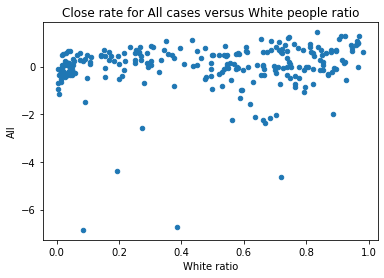

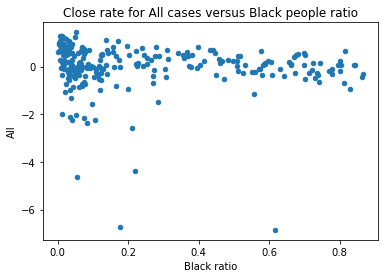

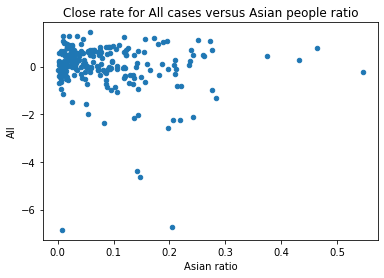

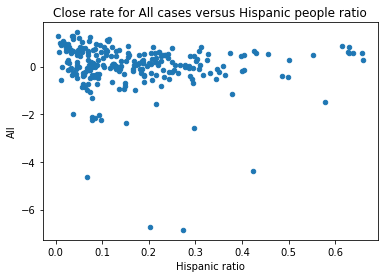

In [174]:
print('Close rate for All cases')
print('White:', census_df['White ratio'].corr(close_rates['All'], method='spearman'))
print('Black:', census_df['Black ratio'].corr(close_rates['All'], method='spearman'))
print('Asian:', census_df['Asian ratio'].corr(close_rates['All'], method='spearman'))
print('Hispanic:', census_df['Hispanic ratio'].corr(close_rates['All'], method='spearman'))

d={
    'White': census_df['White ratio'].corr(close_rates['All'], method='spearman'),
'Black': census_df['Black ratio'].corr(close_rates['All'], method='spearman'),
'Asian': census_df['Asian ratio'].corr(close_rates['All'], method='spearman'),
'Hispanic': census_df['Hispanic ratio'].corr(close_rates['All'], method='spearman')    
}

corrs['All'] = pd.Series(data=d, index=corrs.index)
# corrs

df=pd.concat([census_df['White ratio'],census_df['Black ratio'],census_df['Asian ratio'],census_df['Hispanic ratio'],close_rates['All']],axis=1)
df.plot(
    kind='scatter',
    x='White ratio',
    y='All',
    title='Close rate for All cases versus White people ratio'
)
df.plot(
    kind='scatter',
    x='Black ratio',
    y='All',
    title='Close rate for All cases versus Black people ratio'
)
df.plot(
    kind='scatter',
    x='Asian ratio',
    y='All',
    title='Close rate for All cases versus Asian people ratio'
)
df.plot(
    kind='scatter',
    x='Hispanic ratio',
    y='All',
    title='Close rate for All cases versus Hispanic people ratio'
)


Close rate for Enforcement & Abandoned Vehicles
White: 0.4569980784552977
Black: -0.5948018934246095
Asian: 0.45476533720769946
Hispanic: -0.3239661897984496


<AxesSubplot:title={'center':'Close rate for Enforcement & Abandoned Vehicles versus Hispanic people ratio'}, xlabel='Hispanic ratio', ylabel='Enforcement & Abandoned Vehicles'>

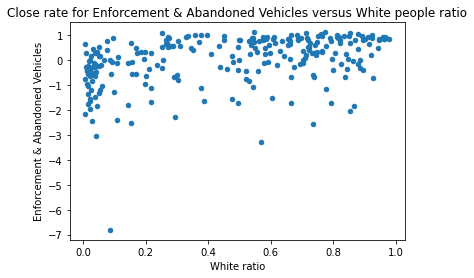

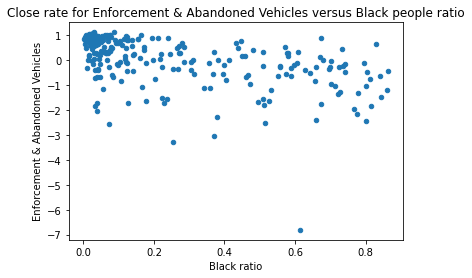

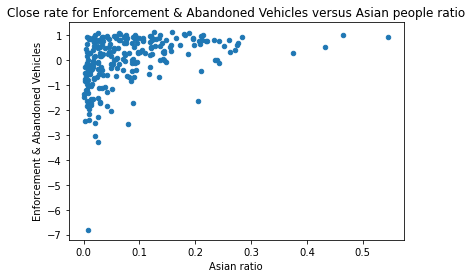

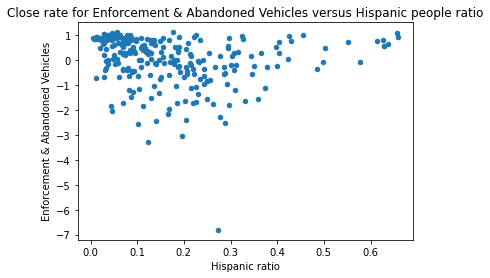

In [175]:
print('Close rate for Enforcement & Abandoned Vehicles')
print('White:', census_df['White ratio'].corr(close_rates['Enforcement & Abandoned Vehicles'], method='spearman'))
print('Black:', census_df['Black ratio'].corr(close_rates['Enforcement & Abandoned Vehicles'], method='spearman'))
print('Asian:', census_df['Asian ratio'].corr(close_rates['Enforcement & Abandoned Vehicles'], method='spearman'))
print('Hispanic:', census_df['Hispanic ratio'].corr(close_rates['Enforcement & Abandoned Vehicles'], method='spearman'))


d={
    'White': census_df['White ratio'].corr(close_rates['Enforcement & Abandoned Vehicles'], method='spearman'),
'Black': census_df['Black ratio'].corr(close_rates['Enforcement & Abandoned Vehicles'], method='spearman'),
'Asian': census_df['Asian ratio'].corr(close_rates['Enforcement & Abandoned Vehicles'], method='spearman'),
'Hispanic': census_df['Hispanic ratio'].corr(close_rates['Enforcement & Abandoned Vehicles'], method='spearman')    
}

corrs['Enforcement & Abandoned Vehicles'] = pd.Series(data=d, index=corrs.index)


df=pd.concat([census_df['White ratio'],census_df['Black ratio'],census_df['Asian ratio'],census_df['Hispanic ratio'],close_rates['Enforcement & Abandoned Vehicles']],axis=1)
df.plot(
    kind='scatter',
    x='White ratio',
    y='Enforcement & Abandoned Vehicles',
    title='Close rate for Enforcement & Abandoned Vehicles versus White people ratio'
)
df.plot(
    kind='scatter',
    x='Black ratio',
    y='Enforcement & Abandoned Vehicles',
    title='Close rate for Enforcement & Abandoned Vehicles versus Black people ratio'
)
df.plot(
    kind='scatter',
    x='Asian ratio',
    y='Enforcement & Abandoned Vehicles',
    title='Close rate for Enforcement & Abandoned Vehicles versus Asian people ratio'
)
df.plot(
    kind='scatter',
    x='Hispanic ratio',
    y='Enforcement & Abandoned Vehicles',
    title='Close rate for Enforcement & Abandoned Vehicles versus Hispanic people ratio'
)


Close rate for Street Cleaning
White: -0.189161666902876
Black: 0.13031780275847488
Asian: -0.16941906756561184
Hispanic: 0.09680948586962297


<AxesSubplot:title={'center':'Close rate for Street Cleaning versus Hispanic people ratio'}, xlabel='Hispanic ratio', ylabel='Street Cleaning'>

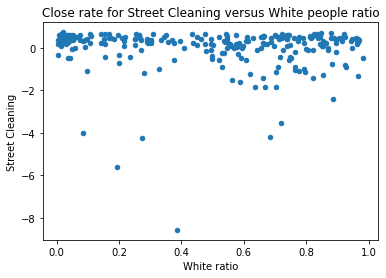

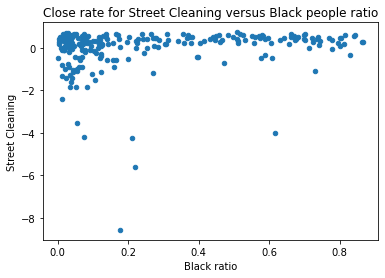

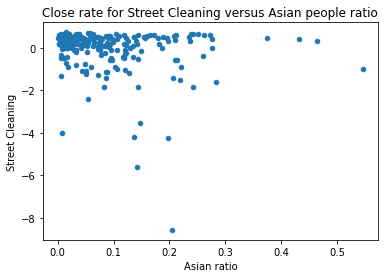

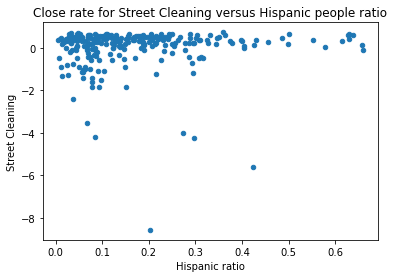

In [179]:
print('Close rate for Street Cleaning')
print('White:', census_df['White ratio'].corr(close_rates['Street Cleaning'], method='spearman'))
print('Black:', census_df['Black ratio'].corr(close_rates['Street Cleaning'], method='spearman'))
print('Asian:', census_df['Asian ratio'].corr(close_rates['Street Cleaning'], method='spearman'))
print('Hispanic:', census_df['Hispanic ratio'].corr(close_rates['Street Cleaning'], method='spearman'))


d={
    'White': census_df['White ratio'].corr(close_rates['Street Cleaning'], method='spearman'),
'Black': census_df['Black ratio'].corr(close_rates['Street Cleaning'], method='spearman'),
'Asian': census_df['Asian ratio'].corr(close_rates['Street Cleaning'], method='spearman'),
'Hispanic': census_df['Hispanic ratio'].corr(close_rates['Street Cleaning'], method='spearman')    
}

corrs['Street Cleaning'] = pd.Series(data=d, index=corrs.index)


df=pd.concat([census_df['White ratio'],census_df['Black ratio'],census_df['Asian ratio'],census_df['Hispanic ratio'],close_rates['Street Cleaning']],axis=1)
df.plot(
    kind='scatter',
    x='White ratio',
    y='Street Cleaning',
    title='Close rate for Street Cleaning versus White people ratio'
)
df.plot(
    kind='scatter',
    x='Black ratio',
    y='Street Cleaning',
    title='Close rate for Street Cleaning versus Black people ratio'
)
df.plot(
    kind='scatter',
    x='Asian ratio',
    y='Street Cleaning',
    title='Close rate for Street Cleaning versus Asian people ratio'
)
df.plot(
    kind='scatter',
    x='Hispanic ratio',
    y='Street Cleaning',
    title='Close rate for Street Cleaning versus Hispanic people ratio'
)

Close rate for Sanitation
White: 0.44885782014165476
Black: -0.4444615482585155
Asian: 0.2830334178522691
Hispanic: -0.28584468393574547


<AxesSubplot:title={'center':'Close rate for Sanitation versus Hispanic people ratio'}, xlabel='Hispanic ratio', ylabel='Sanitation'>

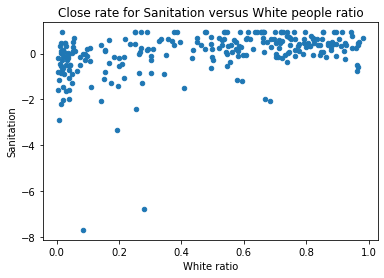

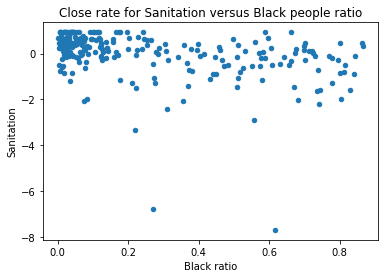

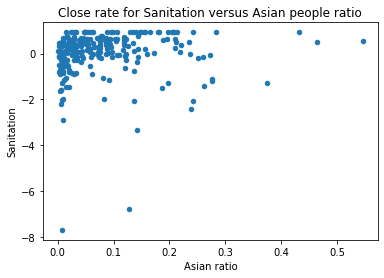

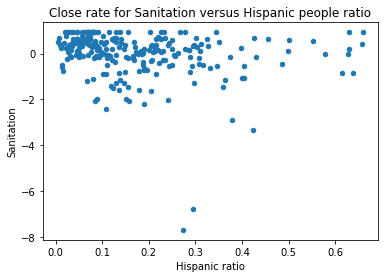

In [176]:
print('Close rate for Sanitation')
print('White:', census_df['White ratio'].corr(close_rates['Sanitation'], method='spearman'))
print('Black:', census_df['Black ratio'].corr(close_rates['Sanitation'], method='spearman'))
print('Asian:', census_df['Asian ratio'].corr(close_rates['Sanitation'], method='spearman'))
print('Hispanic:', census_df['Hispanic ratio'].corr(close_rates['Sanitation'], method='spearman'))


d={
    'White': census_df['White ratio'].corr(close_rates['Sanitation'], method='spearman'),
'Black': census_df['Black ratio'].corr(close_rates['Sanitation'], method='spearman'),
'Asian': census_df['Asian ratio'].corr(close_rates['Sanitation'], method='spearman'),
'Hispanic': census_df['Hispanic ratio'].corr(close_rates['Sanitation'], method='spearman')    
}

corrs['Sanitation'] = pd.Series(data=d, index=corrs.index)


df=pd.concat([census_df['White ratio'],census_df['Black ratio'],census_df['Asian ratio'],census_df['Hispanic ratio'],close_rates['Sanitation']],axis=1)
df.plot(
    kind='scatter',
    x='White ratio',
    y='Sanitation',
    title='Close rate for Sanitation versus White people ratio'
)
df.plot(
    kind='scatter',
    x='Black ratio',
    y='Sanitation',
    title='Close rate for Sanitation versus Black people ratio'
)
df.plot(
    kind='scatter',
    x='Asian ratio',
    y='Sanitation',
    title='Close rate for Sanitation versus Asian people ratio'
)
df.plot(
    kind='scatter',
    x='Hispanic ratio',
    y='Sanitation',
    title='Close rate for Sanitation versus Hispanic people ratio'
)

Close rate for Sanitation
White: -0.362411824563219
Black: 0.2651280816879293
Asian: -0.28932716339610504
Hispanic: 0.36398481510992864


<AxesSubplot:title={'center':'Close rate for Highway Maintenance versus Hispanic people ratio'}, xlabel='Hispanic ratio', ylabel='Highway Maintenance'>

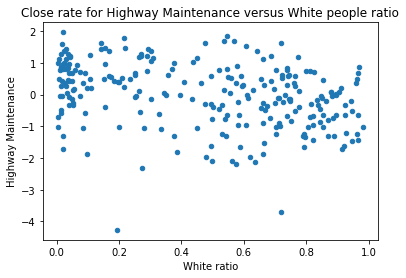

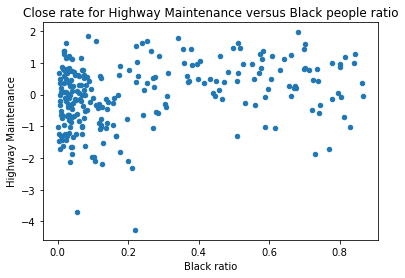

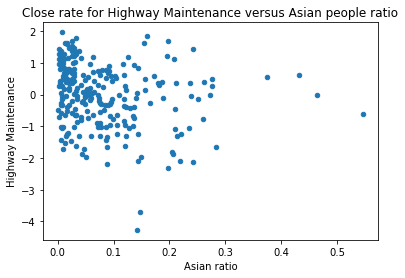

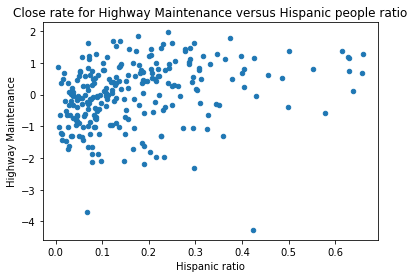

In [180]:
print('Close rate for Sanitation')
print('White:', census_df['White ratio'].corr(close_rates['Highway Maintenance'], method='spearman'))
print('Black:', census_df['Black ratio'].corr(close_rates['Highway Maintenance'], method='spearman'))
print('Asian:', census_df['Asian ratio'].corr(close_rates['Highway Maintenance'], method='spearman'))
print('Hispanic:', census_df['Hispanic ratio'].corr(close_rates['Highway Maintenance'], method='spearman'))


d={
    'White': census_df['White ratio'].corr(close_rates['Highway Maintenance'], method='spearman'),
'Black': census_df['Black ratio'].corr(close_rates['Highway Maintenance'], method='spearman'),
'Asian': census_df['Asian ratio'].corr(close_rates['Highway Maintenance'], method='spearman'),
'Hispanic': census_df['Hispanic ratio'].corr(close_rates['Highway Maintenance'], method='spearman')    
}

corrs['Highway Maintenance'] = pd.Series(data=d, index=corrs.index)


df=pd.concat([census_df['White ratio'],census_df['Black ratio'],census_df['Asian ratio'],census_df['Hispanic ratio'],close_rates['Highway Maintenance']],axis=1)
df.plot(
    kind='scatter',
    x='White ratio',
    y='Highway Maintenance',
    title='Close rate for Highway Maintenance versus White people ratio'
)
df.plot(
    kind='scatter',
    x='Black ratio',
    y='Highway Maintenance',
    title='Close rate for Highway Maintenance versus Black people ratio'
)
df.plot(
    kind='scatter',
    x='Asian ratio',
    y='Highway Maintenance',
    title='Close rate for Highway Maintenance versus Asian people ratio'
)
df.plot(
    kind='scatter',
    x='Hispanic ratio',
    y='Highway Maintenance',
    title='Close rate for Highway Maintenance versus Hispanic people ratio'
)

Close rate for Sanitation
White: -0.07342045685037382
Black: 0.012860685601749288
Asian: -0.10723301767709148
Hispanic: 0.045370616417388744


<AxesSubplot:title={'center':'Close rate for Code Enforcement versus Hispanic people ratio'}, xlabel='Hispanic ratio', ylabel='Code Enforcement'>

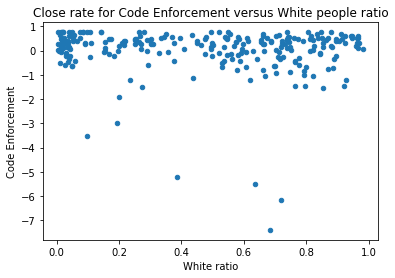

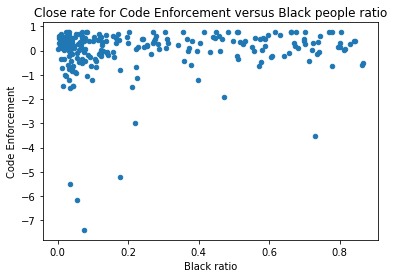

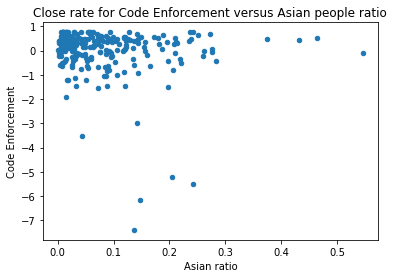

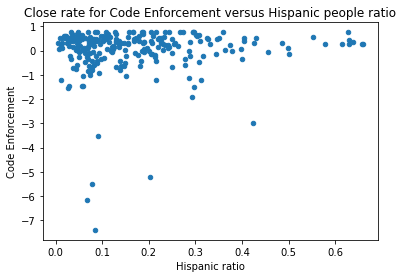

In [181]:
print('Close rate for Sanitation')
print('White:', census_df['White ratio'].corr(close_rates['Code Enforcement'], method='spearman'))
print('Black:', census_df['Black ratio'].corr(close_rates['Code Enforcement'], method='spearman'))
print('Asian:', census_df['Asian ratio'].corr(close_rates['Code Enforcement'], method='spearman'))
print('Hispanic:', census_df['Hispanic ratio'].corr(close_rates['Code Enforcement'], method='spearman'))



d={
    'White': census_df['White ratio'].corr(close_rates['Code Enforcement'], method='spearman'),
'Black': census_df['Black ratio'].corr(close_rates['Code Enforcement'], method='spearman'),
'Asian': census_df['Asian ratio'].corr(close_rates['Code Enforcement'], method='spearman'),
'Hispanic': census_df['Hispanic ratio'].corr(close_rates['Code Enforcement'], method='spearman')    
}

corrs['Code Enforcement'] = pd.Series(data=d, index=corrs.index)


df=pd.concat([census_df['White ratio'],census_df['Black ratio'],census_df['Asian ratio'],census_df['Hispanic ratio'],close_rates['Code Enforcement']],axis=1)
df.plot(
    kind='scatter',
    x='White ratio',
    y='Code Enforcement',
    title='Close rate for Code Enforcement versus White people ratio'
)
df.plot(
    kind='scatter',
    x='Black ratio',
    y='Code Enforcement',
    title='Close rate for Code Enforcement versus Black people ratio'
)
df.plot(
    kind='scatter',
    x='Asian ratio',
    y='Code Enforcement',
    title='Close rate for Code Enforcement versus Asian people ratio'
)
df.plot(
    kind='scatter',
    x='Hispanic ratio',
    y='Code Enforcement',
    title='Close rate for Code Enforcement versus Hispanic people ratio'
)

In [182]:
corrs

,All,Enforcement & Abandoned Vehicles,Sanitation,Code Enforcement,Street Cleaning,Highway Maintenance
White,0.230045,0.456998,0.448858,-0.073420,-0.189162,-0.362412
Black,-0.274822,-0.594802,-0.444462,0.012861,0.130318,0.265128
Asian,-0.027337,0.454765,0.283033,-0.107233,-0.169419,-0.289327
Hispanic,-0.165900,-0.323966,-0.285845,0.045371,0.096809,0.363985
